In [11]:
import glob
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
group_name = {"virt_sym":"Chronokernel"}

In [12]:
def clean_data(file_name):
    fin = open(file_name, "rt")
    fout = open("out.txt", "wt")

    for line in fin:
        if line[0] != '#':
            fout.write(' '.join(line.split()) + '\n')
    fin.close()
    fout.close()
    
    os.remove(file_name)
    os.rename("out.txt", file_name)

In [17]:
def load_data(test_name, run_number=-1,discard_outliers=True):
    if run_number >= 0:
        file_name = 'latency_data/{}/baseline_FULL_RUN_{}.txt'.format(test_name, run_number)
    else:
        file_name = 'latency_data/{}/baseline_FULL_RUN_*.txt'.format(test_name)
    files = glob.glob(file_name)
    data = []
    for file in files:
        clean_data(file)
        graph = pd.read_csv(file, sep=' ')
        graph['System'] = group_name[test_name]
        data.append(graph)
    return data

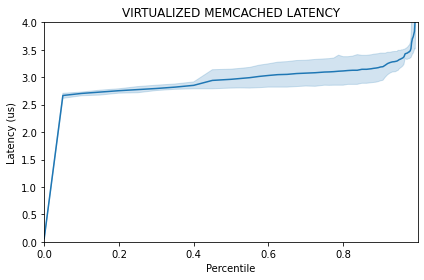

In [23]:
for i in range(0,4):
    virt_sym[i] = load_data("virt_sym", run_number=i)

virt_sym_all = load_data("virt_sym")

virt_sym_data = pd.concat(virt_sym_all, ignore_index=True)

#memcached_data = pd.concat([], ignore_index=True)

fig = sns.lineplot(y="Value", x="Percentile", data=virt_sym_data)

fig.set(title="VIRTUALIZED MEMCACHED LATENCY")

plt.xlabel('Percentile')
plt.ylabel('Latency (us)')
plt.ylim(0,4)
plt.xlim(0,0.999)
#plt.xscale("log")
#plt.xticks(np.logspace(0, 0.999, num=10))
plt.tight_layout()
plt.savefig('plt.png')
